In [16]:
import pandas as pd
import os
from keras.models import Sequential 
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt

In [3]:
result_dir = '../results/ids-dataset'

In [4]:
train_df = pd.read_parquet(os.path.join(result_dir,"cicids2018_traindf.parquet"))
test_df = pd.read_parquet(os.path.join(result_dir,"cicids2018_testdf.parquet"))

In [5]:
from utils import *

2022-06-15 07:29:57.642013: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [6]:
train_df_bn = set_binary_label(train_df,label_col='Label', default_class='Benign',return_col=False)
test_df_bn = set_binary_label(test_df,label_col='Label', default_class='Benign',return_col=False)

In [7]:
lab_dic, lab_name = cluster_labels_2018()

{'Brute Force -Web': 0, 'Brute Force -XSS': 0, 'SQL Injection': 0, 'DoS attacks-Hulk': 1, 'DoS attacks-GoldenEye': 2, 'DoS attacks-Slowloris': 3, 'Bot': 4, 'DDoS attacks-LOIC-HTTP': 5, 'DDOS attack-HOIC': 6, 'Infilteration': 7, 'FTP-BruteForce': 8, 'SSH-Bruteforce': 9}


In [8]:
train_mul= set_multiple_label(train_df,label_col='Label', label_dic = lab_dic, return_col=False)
test_mul = set_multiple_label(test_df,label_col='Label', label_dic = lab_dic, return_col=False)

drop Benign
drop DoS attacks-SlowHTTPTest
original instances:  5971201
drop intances:  5310540
after drop:  660661
drop Benign
drop DoS attacks-SlowHTTPTest
original instances:  1492801
drop intances:  1327411
after drop:  165390


# binary classification

In [9]:
from tensorflow import keras

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
st_scaler_bn = StandardScaler()

In [12]:
trainx = train_df_bn.loc[:,train_df.columns!='Label']
trainy = train_df_bn['Label']
testx = test_df_bn.loc[:,test_df.columns!='Label']
testy = test_df_bn['Label']

In [13]:
trainx.shape

(5971201, 67)

In [14]:
trainx_st = st_scaler_bn.fit_transform(trainx)
testx_st = st_scaler_bn.transform(testx)

# Train DNN model for Binary Classification

In [14]:
from keras.models import Sequential 
from keras.layers import Dense, Activation

In [ ]:
clf_bn = Sequential([
    Dense(32, input_shape =(67,) ,activation="relu"),
    Dense(1, activation='sigmoid')
])

In [16]:
clf_bn.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])
clf_bn.fit(trainx_st,trainy,epochs=20, batch_size=256)

Epoch 1/20
   29/46651 [..............................] - ETA: 4:26 - loss: 0.3858 - accuracy: 0.8710

2022-06-02 06:34:12.934351: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


46651/46651 [==============================] - 261s 6ms/step - loss: 0.0611 - accuracy: 0.9887
Epoch 2/20
46651/46651 [==============================] - 261s 6ms/step - loss: 0.0696 - accuracy: 0.9892
Epoch 3/20
46651/46651 [==============================] - 261s 6ms/step - loss: 0.0728 - accuracy: 0.9893
Epoch 4/20
46651/46651 [==============================] - 262s 6ms/step - loss: 0.0685 - accuracy: 0.9893
Epoch 5/20
46651/46651 [==============================] - 263s 6ms/step - loss: 0.0646 - accuracy: 0.9892
Epoch 6/20
46651/46651 [==============================] - 264s 6ms/step - loss: 0.0762 - accuracy: 0.9891
Epoch 7/20
46651/46651 [==============================] - 262s 6ms/step - loss: 0.0783 - accuracy: 0.9890
Epoch 8/20
46651/46651 [==============================] - 262s 6ms/step - loss: 0.0728 - accuracy: 0.9890
Epoch 9/20
46651/46651 [==============================] - 266s 6ms/step - loss: 0.0720 - accuracy: 0.9889
Epoch 10/20
46651/46651 [==============================] 

In [17]:
score = clf_bn.evaluate(testx_st,testy, batch_size=256)
print(score)

5832/5832 [==============================] - 24s 4ms/step - loss: 0.0761 - accuracy: 0.9893
[0.07607167214155197, 0.9892517328262329]


## model save

In [18]:
clf_bn.save(os.path.join(result_dir,"cicids2018_nn_binary"))

INFO:tensorflow:Assets written to: ../results/ids-dataset/cicids2018_nn_binary/assets


In [33]:
from sklearn.metrics import roc_curve, auc

predy = clf_bn(testx_st).numpy()
pos_label = 1 # 1 or 0
fpr, tpr, thresholds = roc_curve(testy.values, predy, pos_label=pos_label)
roc_auc = auc(fpr, tpr)

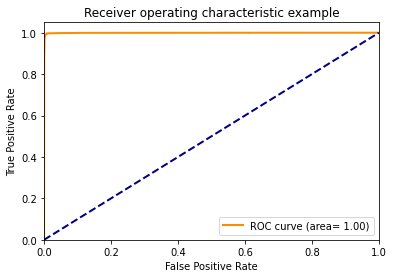

In [34]:
import matplotlib.pyplot as plt

lw=2
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=lw, label ="ROC curve (area= %.2f)"%roc_auc)
plt.plot([0,1],[0,1], color = "navy", lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

# multi-class classification

In [18]:
lab_dic18, lab_name18 = cluster_labels_2018()

{'Brute Force -Web': 0, 'Brute Force -XSS': 0, 'SQL Injection': 0, 'DoS attacks-Hulk': 1, 'DoS attacks-GoldenEye': 2, 'DoS attacks-Slowloris': 3, 'Bot': 4, 'DDoS attacks-LOIC-HTTP': 5, 'DDOS attack-HOIC': 6, 'Infilteration': 7, 'FTP-BruteForce': 8, 'SSH-Bruteforce': 9}


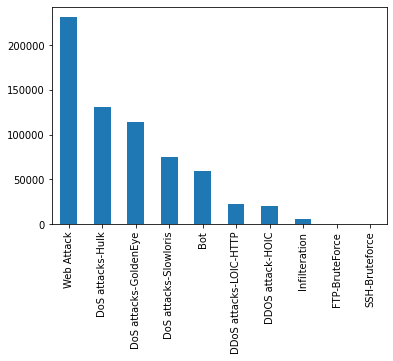

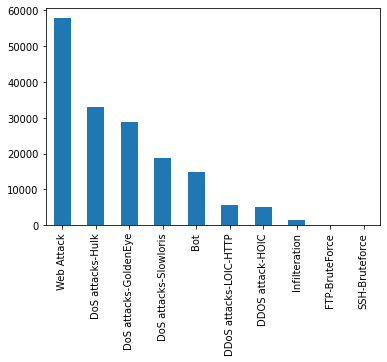

In [19]:
import matplotlib.pyplot as plt
train_mul['Label'].value_counts().plot(kind='bar')
plt.xticks(range(10),lab_name18, rotation=90)
plt.show()
test_mul['Label'].value_counts().plot(kind='bar')
plt.xticks(range(10),lab_name18, rotation=90)
plt.show()

In [20]:
trainx_m = train_mul.loc[:,train_mul.columns!='Label']
trainy_m = train_mul['Label']
testx_m = test_mul.loc[:,test_mul.columns!='Label']
testy_m = test_mul['Label']

In [29]:
num_class = len(np.unique(testy_m))

In [22]:
st_scaler_mul = StandardScaler()

In [23]:
trainx_m_st = st_scaler_mul.fit_transform(trainx_m)
testx_m_st = st_scaler_mul.transform(testx_m)

In [24]:
from keras.utils import to_categorical

In [25]:
trainy_mc = to_categorical(trainy_m)
testy_mc = to_categorical(testy_m)

In [1]:
clf_mul = Sequential([
    Dense(32, input_shape =(67,) ,activation="relu"),
    Dense(num_class, activation='softmax')
])

In [27]:
from tensorflow.keras import losses
loss_fn = losses.CategoricalCrossentropy(label_smoothing=0.09)

In [28]:
clf_mul.compile(optimizer="rmsprop", loss=loss_fn, metrics=['accuracy'])
clf_mul.fit(trainx_m_st,trainy_mc,epochs=20, batch_size=256)

Epoch 1/20
  35/2581 [..............................] - ETA: 12s - loss: 1.8697 - accuracy: 0.5562

2022-06-15 07:31:33.478428: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


2581/2581 [==============================] - 14s 5ms/step - loss: 0.5016 - accuracy: 0.9903
Epoch 2/20
2581/2581 [==============================] - 13s 5ms/step - loss: 0.4632 - accuracy: 0.9992
Epoch 3/20
2581/2581 [==============================] - 13s 5ms/step - loss: 0.4622 - accuracy: 0.9994
Epoch 4/20
2581/2581 [==============================] - 13s 5ms/step - loss: 0.4619 - accuracy: 0.9995
Epoch 5/20
2581/2581 [==============================] - 13s 5ms/step - loss: 0.4616 - accuracy: 0.9995
Epoch 6/20
2581/2581 [==============================] - 13s 5ms/step - loss: 0.4615 - accuracy: 0.9996
Epoch 7/20
2581/2581 [==============================] - 13s 5ms/step - loss: 0.4615 - accuracy: 0.9996
Epoch 8/20
2581/2581 [==============================] - 13s 5ms/step - loss: 0.4613 - accuracy: 0.9996
Epoch 9/20
2581/2581 [==============================] - 13s 5ms/step - loss: 0.4613 - accuracy: 0.9996
Epoch 10/20
2581/2581 [==============================] - 13s 5ms/step - loss: 0.4613

In [30]:
score_m = clf_mul.evaluate(testx_m_st,testy_mc, batch_size=256)
print(score_m)

647/647 [==============================] - 3s 4ms/step - loss: 0.4660 - accuracy: 0.9996
[0.46598169207572937, 0.9995525479316711]


## model save

In [31]:
clf_mul.save(os.path.join(result_dir,"cicids2018_nn_mult_LS"))

INFO:tensorflow:Assets written to: ../results/ids-dataset/cicids2018_nn_mult_LS/assets


In [47]:
clf_mul.predict(testx_m_st)

2264/2264 [==============================] - 2s 786us/step


array([[1.25529739e-20, 1.33731443e-10, 3.17639430e-37, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.27417985e-21, 9.16151048e-16, 1.95654193e-34, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.94646599e-11, 9.60154197e-17, 6.31389385e-11, ...,
        1.00000000e+00, 1.28442679e-08, 4.32760672e-09],
       ...,
       [6.34147310e-15, 7.24045503e-06, 4.58907259e-08, ...,
        9.99992728e-01, 2.44009279e-09, 1.64337688e-09],
       [1.35369782e-14, 3.83661489e-17, 3.13073097e-18, ...,
        3.09970383e-10, 9.99998331e-01, 1.69053726e-06],
       [4.21196937e-24, 1.00000000e+00, 1.68402506e-30, ...,
        0.00000000e+00, 0.00000000e+00, 1.09677095e-35]], dtype=float32)

In [73]:
def apply_nn_clf_with_scaler(clf, scaler, df_x, prob=True):
    df_x_st = scaler.transform(df_x)
    preds = clf.predict(df_x_st)
    if prob:
        return preds
    else:        
        if preds.shape[1]==1:
            return np.argmax(preds>0.5).astype("int32")
        else:
            return np.argmax(preds, axis=-1)
def score_nn_clf_with_scaler(clf, scaler, df_x, df_y, binary=True):
    df_x_st = scaler.transform(df_x)
    if binary:
        y = df_y.values
    else:
        y = to_categorical(df_y.values)
    score = clf.evaluate(df_x_st.values,y, batch_size=256)
    return score

# evaluate multi-class model

In [50]:
from sklearn.metrics import confusion_matrix

In [53]:
pred_m = clf_mul.predict(testx_m_st)
predy_m = np.argmax(pred_m,axis=-1)

2264/2264 [==============================] - 6s 3ms/step


In [64]:
confusion_mtx = confusion_matrix(testy_m, predy_m)

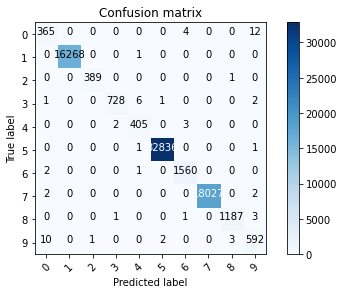

In [65]:
plot_confusion_matrix(confusion_mtx, classes = range(10))

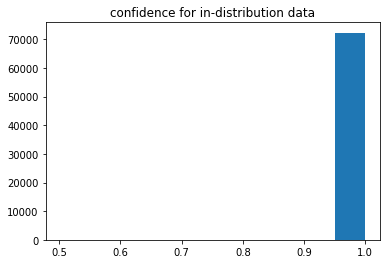

In [67]:
plt.hist(np.max(pred_m,axis=1))
plt.title("confidence for in-distribution data")
plt.show()

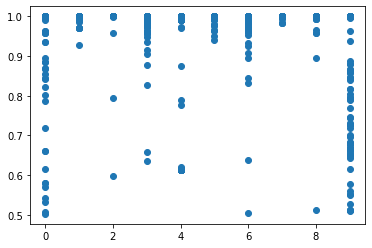

In [69]:
plt.scatter(predy_m,np.max(pred_m,axis=1))
plt.show()

In [55]:
lab_dic

{'Brute Force -Web': 0,
 'Brute Force -XSS': 0,
 'SQL Injection': 0,
 'DoS attacks-Hulk': 1,
 'DoS attacks-GoldenEye': 2,
 'DoS attacks-Slowloris': 3,
 'Bot': 4,
 'DDoS attacks-LOIC-HTTP': 5,
 'DDOS attack-HOIC': 6,
 'Infilteration': 7,
 'FTP-BruteForce': 8,
 'SSH-Bruteforce': 9}

In [53]:
ooc_col = 'Bot' # 'SSH-Patator', 'Heartbleed', 'Benign', 'Infiltration'
ooc_idx = (train_df['Label']==ooc_col)
train_ooc = train_df.loc[ooc_idx]
train_ooc = train_ooc.loc[:,train_ooc.columns!='Label']

In [54]:
train_ooc.shape

(114233, 67)

In [38]:
# clf_mul18 = keras.models.load_model(os.path.join(result_dir,"cicids2018_nn_mult"))

In [59]:
pred_ooc = apply_nn_clf_with_scaler(clf_mul, st_scaler_mul, train_ooc[:1000], prob = False)
prob_ooc = apply_nn_clf_with_scaler(clf_mul, st_scaler_mul, train_ooc[:1000], prob = True)

32/32 [==============================] - 0s 2ms/step


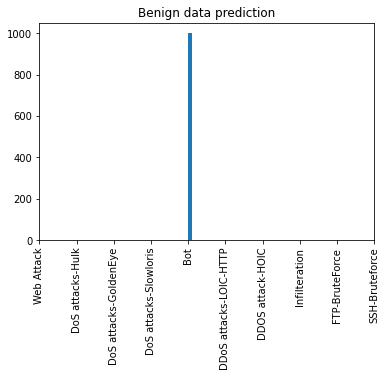

In [60]:
plt.hist(pred_ooc)
plt.title("Benign data prediction")
plt.xticks(range(10),lab_name, rotation=90)
plt.show()

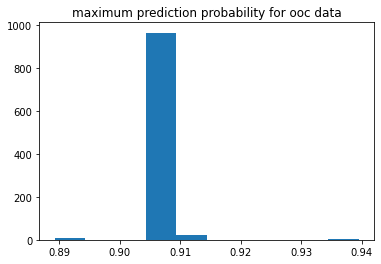

In [61]:
plt.hist(np.max(prob_ooc,axis=1))
plt.title("maximum prediction probability for ooc data")
plt.show()

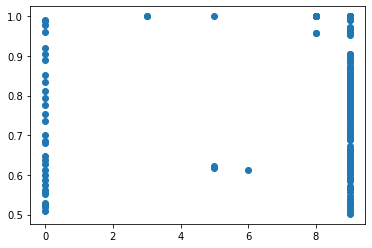

In [77]:
plt.scatter(pred_ooc,np.max(prob_ooc,axis=1),)
plt.show()